In [ ]:
import pandas as pd

df = pd.read_csv("advanced_customer_data.csv")

display(df.head())
display(df.tail())

df.info()

df.describe(include='all')


In [ ]:
df = df.drop_duplicates()


In [ ]:
df.isnull().sum()


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df['PaymentPreference'] = df['PaymentPreference'].astype('category').cat.codes


In [ ]:
import numpy as np

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['AnnualIncome', 'SpendingScore', 'AvgTransactionValue']:
    df = remove_outliers_iqr(df, col)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


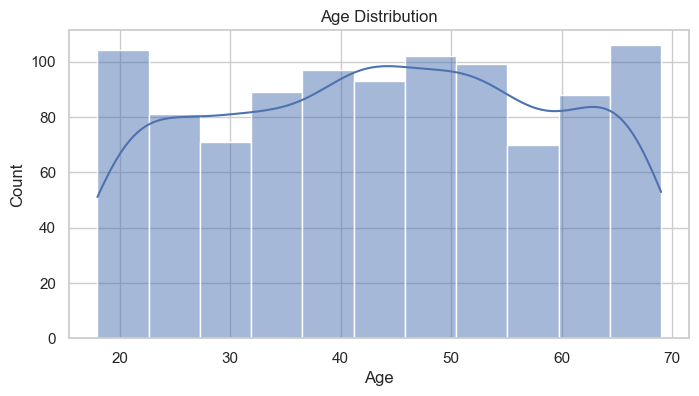

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


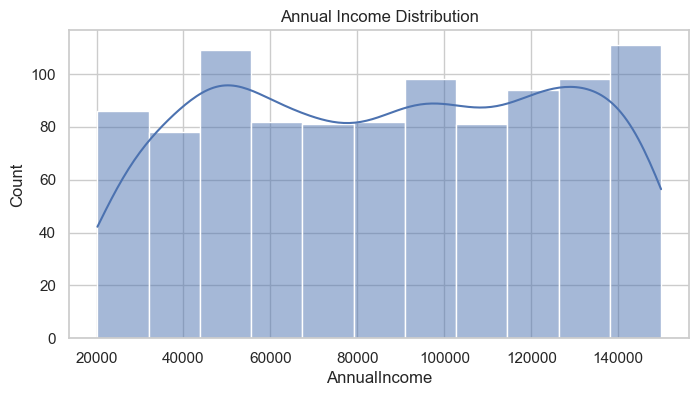

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['AnnualIncome'], kde=True)
plt.title("Annual Income Distribution")
plt.show()


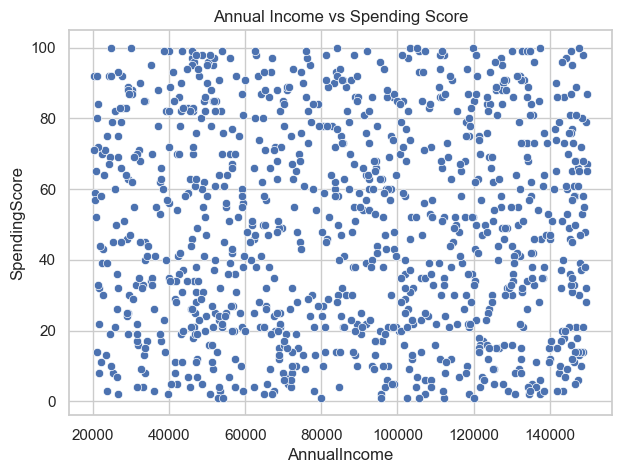

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()


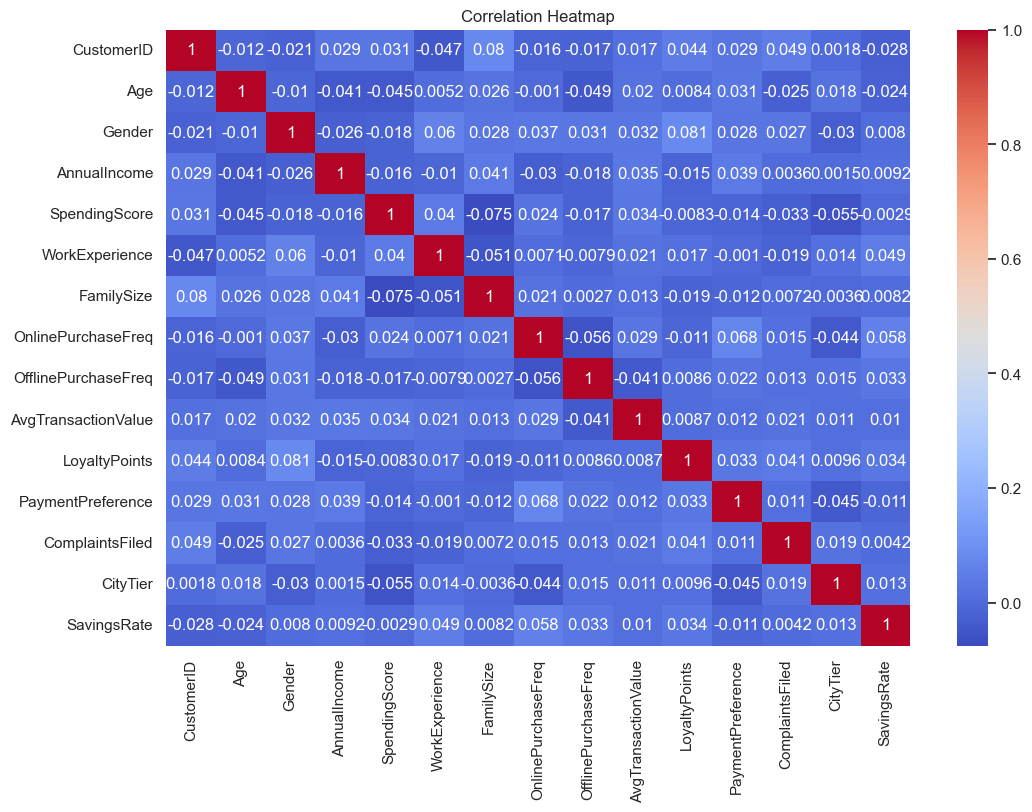

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


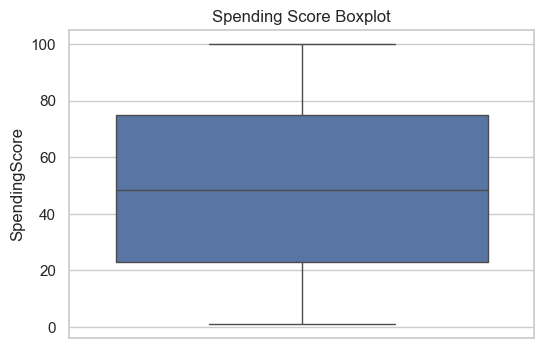

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(df['SpendingScore'])
plt.title("Spending Score Boxplot")
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

features = df.drop(['CustomerID'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

scaled_data[:5]


array([[ 0.81295917, -0.9530986 , -0.56070013, -1.51261844, -0.32111519,
         0.44926866,  0.76124633, -0.49345563, -0.61518544, -0.36897959,
        -1.37151219, -0.47559531,  1.54255134,  0.27161144],
       [ 1.68057836, -0.9530986 ,  0.95020885,  1.18348861, -0.75646659,
        -0.04770995, -0.06619533, -0.14717098,  0.20626973, -1.5878896 ,
        -0.47392568, -1.50205999,  1.54255134,  1.02922122],
       [ 0.1455598 , -0.9530986 ,  1.53626061,  0.5350578 , -1.27888826,
        -1.53864577, -1.72107866,  0.89168299,  1.23691146, -1.38265788,
        -1.37151219, -1.50205999, -1.04562205, -0.61464905],
       [-0.78879932,  1.04920939, -1.50374912, -0.65942001,  0.46251732,
        -1.53864577, -0.42081319,  1.41110997,  0.57674497, -1.50468755,
         0.42366083, -0.47559531, -1.04562205,  0.7623901 ],
       [ 1.07991892, -0.9530986 ,  1.19361843, -0.96657144,  0.5495876 ,
         0.44926866, -1.48466676,  0.02597135, -0.22348433, -1.35284381,
         1.32124734, -1.15

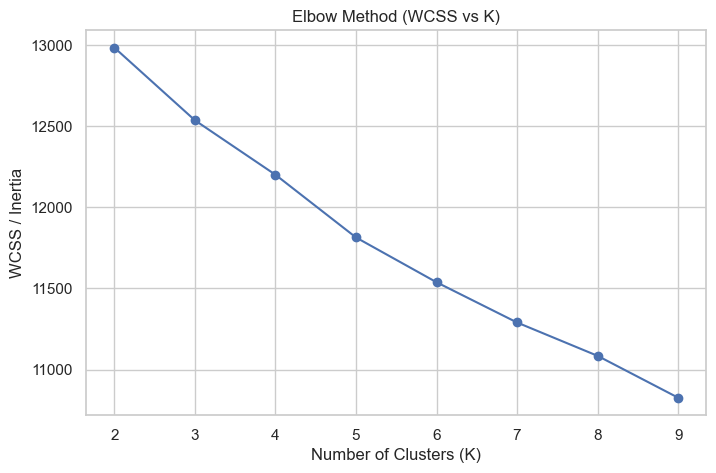

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster Sum of Squares

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    wcss.append(model.inertia_)  # inertia_ = WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o')
plt.title("Elbow Method (WCSS vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.grid(True)
plt.show()


K = 2 --> Silhouette Score = 0.07294651716062993
K = 3 --> Silhouette Score = 0.05891127901450177
K = 4 --> Silhouette Score = 0.05277524213253282
K = 5 --> Silhouette Score = 0.0558183778912348
K = 6 --> Silhouette Score = 0.05478142384425594
K = 7 --> Silhouette Score = 0.05457008154726334
K = 8 --> Silhouette Score = 0.05521265470465392
K = 9 --> Silhouette Score = 0.058913737642838956


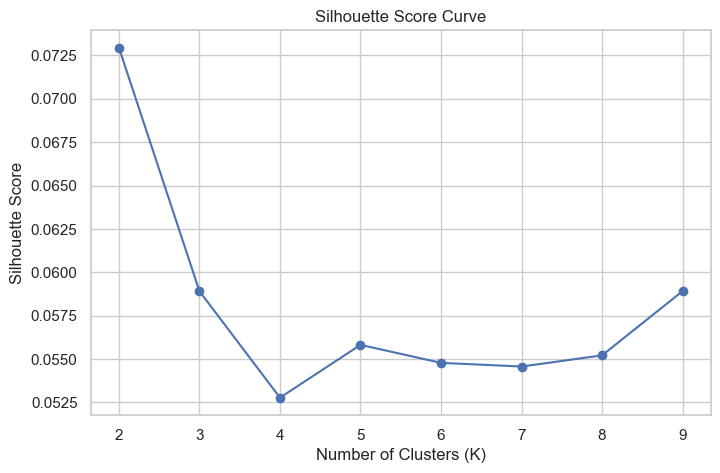

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    scores.append(score)
    print(f"K = {k} --> Silhouette Score = {score}")

# Plot Silhouette Score Curve
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Curve")
plt.grid(True)
plt.show()


In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


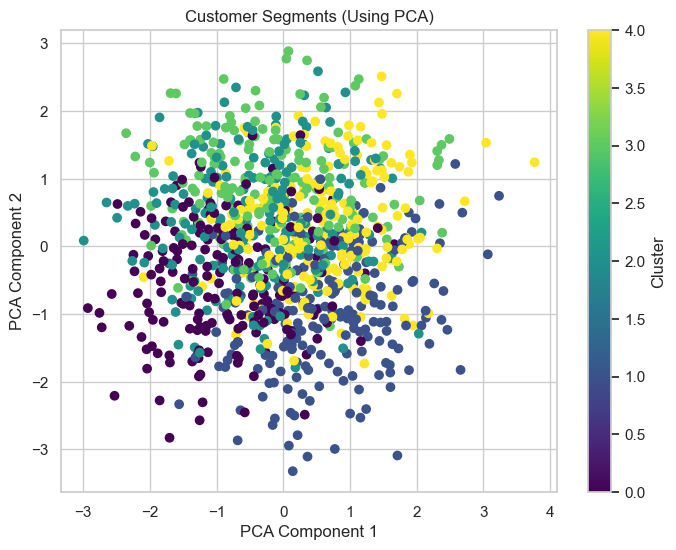

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=df['Cluster'], cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (Using PCA)")
plt.colorbar(label="Cluster")
plt.show()
